In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

In [2]:
mpsa_data_df = pd.read_csv("mpsa_data.csv")

In [3]:
mpsa_data_df.head()

,tot_ct,ex_ct,psi,log10_psi,splice_site
0,28,2,1.055374,0.023406,GGAGUGAUG
1,315,7,0.258277,-0.587914,AGUGUGCAA
2,193,15,0.841398,-0.074999,UUCGCGCCA
3,27,0,0.364355,-0.438475,UAAGCUUUU
4,130,2,0.233632,-0.631467,AUGGUCGGG


In [4]:
brca2_mutations: list = [mutation.strip() for mutation in open(Path("brca2_mutations.txt")).readlines()]

In [7]:
def splice_site_coordinate_conversion(splice_site_index: int) -> int:
    """Convert splice site coordinates into 0-based indexing"""
    if splice_site_index < -3 or splice_site_index > 6:
        return None
    elif splice_site_index == -3:
        return 0
    else:
        return splice_site_index + 2

In [13]:
def get_decile_index(psi, minimum=0, bin_width=10) -> int:
    """Returns the decile  for measurements scaled 0 to 100. PSI of
    >= 100 is assigned the last decile."""
    index = int((psi - minimum) // bin_width)
    if index > 9:
        return 9
    else:
        return index

In [10]:
psi_values = mpsa_data_df["psi"].to_list()

In [11]:
psi_values[0]

1.0553741235231964

In [14]:
decile_indices: list = [get_decile_index(psi) for psi in psi_values]

In [19]:
len(psi_values)

30483

In [20]:
max(psi_values)

199.2780872794801

In [21]:
max(decile_indices)

9

In [22]:
from collections import Counter

In [23]:
decile_indices_counter: dict = dict(Counter(decile_indices))

In [31]:
dict(sorted(decile_indices_counter.items()))

{0: 28992, 1: 235, 2: 131, 3: 103, 4: 86, 5: 83, 6: 94, 7: 112, 8: 139, 9: 508}

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

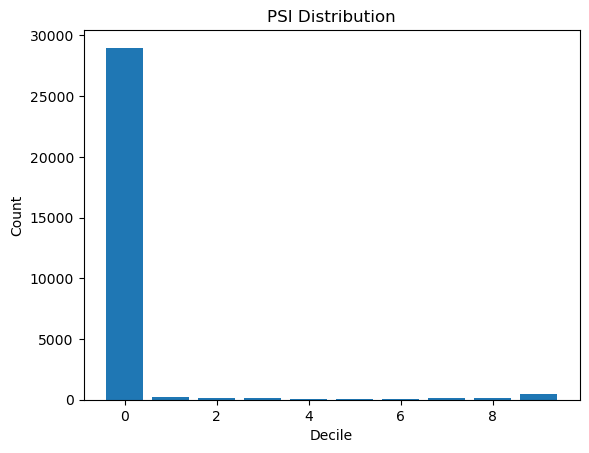

In [27]:
plt.bar(decile_indices_counter.keys(), decile_indices_counter.values())
plt.title("PSI Distribution")
plt.xlabel("Decile")
plt.ylabel("Count")